## Main file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from preprocessing.cleaner import convert_cat_to_num,missing_value
from preprocessing.test import test as p_test
from preprocessing.label import label_encoder
from preprocessing.split import split
from preprocessing.feature_reduction import plot_2D
from visualization.maps import heatmap, nan_map
from visualization.data_overview import numeric_features_distribution_per_class,categorical_features_histograms
from sklearn.svm import SVC
from training.hyperparameters_tuning import hyperparameters_tuning
from training.train_models import train_models
from training.evaluation import cla_evaluation
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from preprocessing.normalization import normalization

### Kidney disease

In [2]:
TARGET_NAME = "class"
DATA_NAME = "kidney"
FEATURES = ["id","age","bp","sg","al","su","bgr","bu","sc","sod","pot","hemo","pcv","wc","rc"]
import json
with open("settings.json") as file:
            settings = json.load(file) # Retrieve paths 

sns.set_style("darkgrid")

In [3]:
# Preprocessing
data = pd.read_csv(settings["paths"][DATA_NAME])                    # Read the csv file
clean_data_1 = convert_cat_to_num(data,FEATURES)                    # Convert object datatype to float when its possible
clean_data_2 = missing_value(clean_data_1,drop_num=True)            # Fill the missing values
p_test(clean_data_2,data)                                           # Test the length of data after cleaning process
numerical_features = clean_data_2.drop(columns=TARGET_NAME).select_dtypes(include=np.number).columns
categorical_features = clean_data_2.select_dtypes(include=['object'])
normalized_data = normalization(clean_data_2,features = numerical_features,mode=0) #Data normalization for numerical features
label_data,label_dico = label_encoder(normalized_data)                 # Encode strings data
X_train, X_test, y_train, y_test = split(label_data,TARGET_NAME)

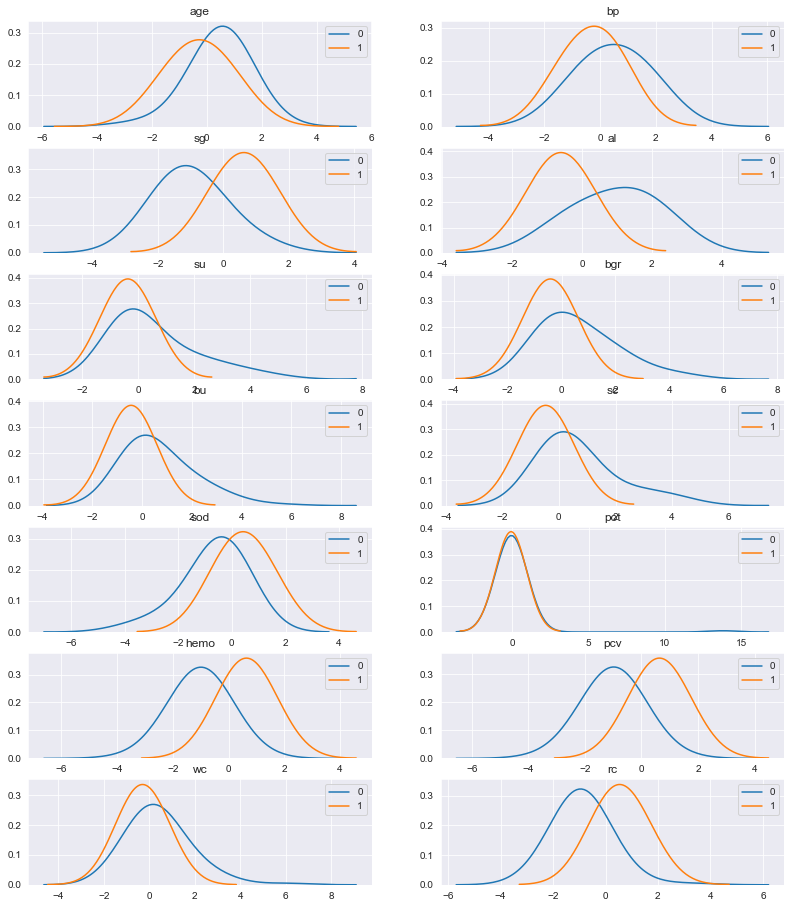

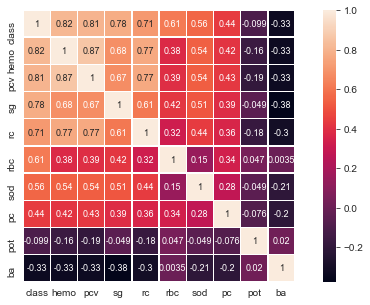

In [4]:
# Vizualisation
numeric_features_distribution_per_class(data, numerical_features,TARGET_NAME,bandwith = 1)

heatmap(clean_data_2,TARGET_NAME) #Study correlation between features and data

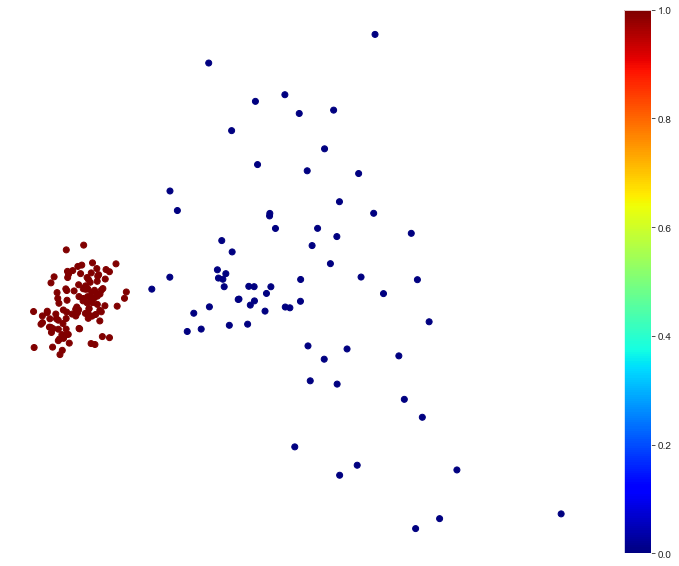

In [5]:
#2D Visulaization using PCA

plot_2D(X_train,y_train)

In [32]:
## Models + Training
# SVC
svm = SVC(C=10,kernel="radius")
parameters_svc = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
logs_svm, best_svm = hyperparameters_tuning(svm,parameters_svc,X_train,y_train,cv=5)

# RFC
rfc = RandomForestClassifier(n_estimators=100,max_depth=20)
parameters_rfc = {"n_estimators":[50,100,150],"max_depth":[10,20,30,None]}
logs_rfc, best_rfc = hyperparameters_tuning(rfc,parameters_rfc,X_train,y_train,cv=5)

# ABC
abc = AdaBoostClassifier(n_estimators=100)
parameters_abc = {"n_estimators":[50,100,150]}
logs_abc, best_abc = hyperparameters_tuning(abc,parameters_abc,X_train,y_train,cv=5)

#Trained Models
Models = {"SVM":best_svm,"RFC":best_rfc,"ABC":best_abc}


Best combination of parameters is : {'C': 1, 'kernel': 'linear'}
Best combination of parameters is : {'max_depth': 10, 'n_estimators': 50}
Best combination of parameters is : {'n_estimators': 100}


In [33]:
logs_svm

{"{'C': 1, 'kernel': 'linear'}": 1.0,
 "{'C': 1, 'kernel': 'rbf'}": 1.0,
 "{'C': 10, 'kernel': 'linear'}": 1.0,
 "{'C': 10, 'kernel': 'rbf'}": 1.0}

In [34]:
for name,m in Models.items():
    print(f"Accuracy of {name}")
    cla_evaluation(m,X_test,y_test)

Accuracy of SVM
[[ 7  0]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        14

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Accuracy of RFC
[[ 7  0]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        14

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Accuracy of ABC
[[ 7  0]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        14

    accuracy                           1.00        21
   macro avg       1.00

### Banknote

In [40]:
TARGET_NAME = "class"
DATA_NAME = "banknote"
FEATURES = ["variance","skewness","curtosis","entropy"]
import json
with open("settings.json") as file:
            settings = json.load(file) # Retrieve paths 

In [41]:
data

,variance,skewness,curtosis,entropy,class
0,1.121806,1.149455,-0.975970,0.354561,-0.894721
1,1.447066,1.064453,-0.895036,-0.128767,-0.894721
2,1.207810,-0.777352,0.122218,0.618073,-0.894721
3,1.063742,1.295478,-1.255397,-1.144029,-0.894721
4,-0.036772,-1.087038,0.736730,0.096587,-0.894721
...,...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996,1.117667
1368,-0.641313,-1.158984,1.179023,0.730127,1.117667
1369,-1.472357,-2.621646,3.759017,-0.754884,1.117667
1370,-1.406693,-1.756471,2.552043,-0.043158,1.117667


In [42]:
# Preprocessing
data = pd.read_csv(settings["paths"][DATA_NAME])                    # Read the csv file
clean_data_1 = convert_cat_to_num(data,FEATURES)                    # Convert object datatype to float when its possible
clean_data_2 = missing_value(clean_data_1,drop_num=True)            # Fill the missing values
p_test(clean_data_2,data)                                           # Test the length of data after cleaning process
numerical_features = clean_data_2.drop(columns=TARGET_NAME).select_dtypes(include=np.number).columns
categorical_features = clean_data_2.select_dtypes(include=['object'])
normalized_data = normalization(clean_data_2,numerical_features,mode=0) #Data normalization for numerical features
label_data,label_dico = label_encoder(normalized_data)                 # Encode strings data
X_train, X_test, y_train, y_test = split(label_data,TARGET_NAME)

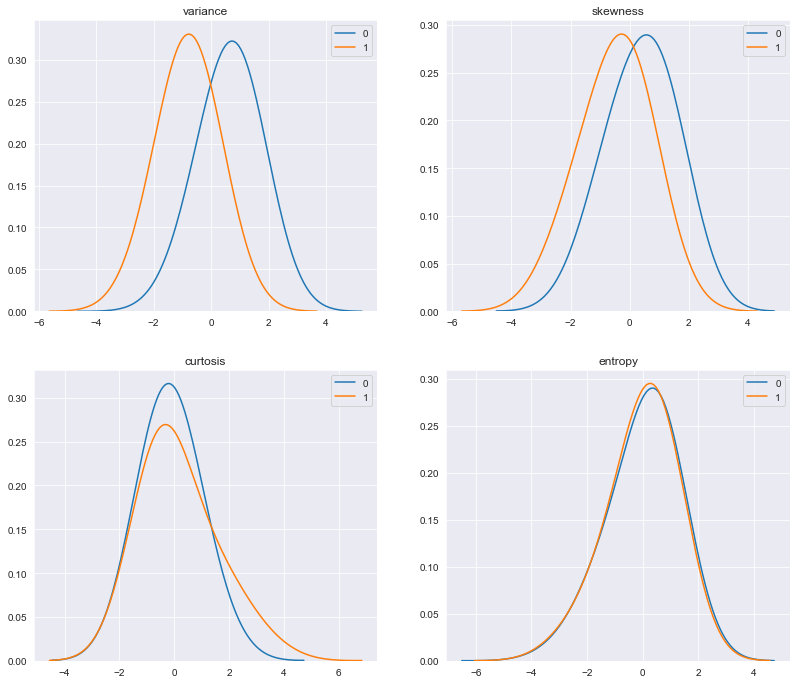

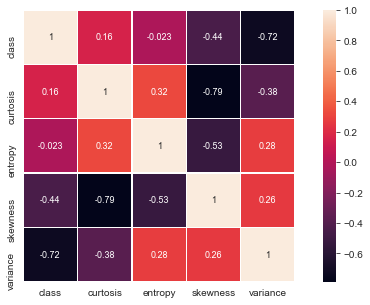

In [43]:
# Vizualisation
numeric_features_distribution_per_class(data, numerical_features,TARGET_NAME,bandwith = 1)
heatmap(clean_data_2,TARGET_NAME) #Study correlation between features and data

In [44]:
## Models + Training
# SVC
svm = SVC(C=10,kernel="radius")
parameters_svc = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
logs_svm, best_svm = hyperparameters_tuning(svm,parameters_svc,X_train,y_train,cv=5)

# RFC
rfc = RandomForestClassifier(n_estimators=100,max_depth=20)
parameters_rfc = {"n_estimators":[50,100,150],"max_depth":[10,20,30,None]}
logs_rfc, best_rfc = hyperparameters_tuning(rfc,parameters_rfc,X_train,y_train,cv=5)

# ABC
abc = AdaBoostClassifier(n_estimators=100)
parameters_abc = {"n_estimators":[50,100,150]}
logs_abc, best_abc = hyperparameters_tuning(abc,parameters_abc,X_train,y_train,cv=5)

#Trained Models
Models = {"SVM":best_svm,"RFC":best_rfc,"ABC":best_abc}

Best combination of parameters is : {'C': 10, 'kernel': 'rbf'}
Best combination of parameters is : {'max_depth': 10, 'n_estimators': 50}
Best combination of parameters is : {'n_estimators': 100}


In [45]:
logs_rfc

{"{'max_depth': 10, 'n_estimators': 50}": 0.9935123926138048,
 "{'max_depth': 10, 'n_estimators': 100}": 0.9927026760146145,
 "{'max_depth': 10, 'n_estimators': 150}": 0.9935123926138048,
 "{'max_depth': 20, 'n_estimators': 50}": 0.9927026760146145,
 "{'max_depth': 20, 'n_estimators': 100}": 0.9910832428162338,
 "{'max_depth': 20, 'n_estimators': 150}": 0.9927026760146145,
 "{'max_depth': 30, 'n_estimators': 50}": 0.9926993844837234,
 "{'max_depth': 30, 'n_estimators': 100}": 0.9927026760146145,
 "{'max_depth': 30, 'n_estimators': 150}": 0.9935123926138048,
 "{'max_depth': None, 'n_estimators': 50}": 0.9927026760146145,
 "{'max_depth': None, 'n_estimators': 100}": 0.9927026760146145,
 "{'max_depth': None, 'n_estimators': 150}": 0.9935123926138048}

In [46]:
for name,m in Models.items():
    print(f"Accuracy of {name}")
    cla_evaluation(m,X_test,y_test)

Accuracy of SVM
[[69  0]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        69

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138

Accuracy of RFC
[[67  2]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        69
           1       0.97      1.00      0.99        69

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138

Accuracy of ABC
[[69  0]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        69

    accuracy                           1.00       138
   macro avg       1.00